In [1]:
#Principles of Machine Learning Final Exam

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


In [3]:
customers = pd.read_csv('AdvWorksCusts.csv')
customers.dropna(axis='columns', how='any', inplace=True)
customers.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 19 columns):
CustomerID              16519 non-null int64
FirstName               16519 non-null object
LastName                16519 non-null object
AddressLine1            16519 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519 non-null int64
NumberChildrenAtHome    16519 non-null int64
TotalChildren           16519 non-null int64
YearlyIncome            16519 non-null int64
dtypes: int64(6), objec

In [5]:
monthly_ave= pd.read_csv('AW_AveMonthSpend.csv')
monthly_ave.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [6]:
bike_buyer= pd.read_csv('AW_BikeBuyer.csv')
bike_buyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [7]:
customers_bike = pd.merge(left=customers, right=bike_buyer, on='CustomerID', how='left')
CustomerTrain= pd.merge(left=customers_bike, right=monthly_ave, on='CustomerID', how='left')
CustomerTrain.head(50)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,1,95
5,11005,Julio,Ruiz,7305 Humphrey Drive,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,...,Professional,M,S,1,1,0,0,103199,1,78
6,11006,Janet,Alvarez,2612 Berry Dr,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,...,Professional,F,S,1,1,0,0,84756,1,54
7,11007,Marco,Mehta,942 Brook Street,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,...,Professional,M,M,1,2,3,3,109759,1,130
8,11008,Rob,Verhoff,624 Peabody Road,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,...,Professional,F,S,1,3,4,4,88005,1,85
9,11009,Shannon,Carlson,3839 Northgate Road,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,...,Professional,M,S,0,1,0,0,106399,0,74


In [8]:
CustomerTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 0 to 17208
Data columns (total 21 columns):
CustomerID              17209 non-null int64
FirstName               17209 non-null object
LastName                17209 non-null object
AddressLine1            17209 non-null object
City                    17209 non-null object
StateProvinceName       17209 non-null object
CountryRegionName       17209 non-null object
PostalCode              17209 non-null object
PhoneNumber             17209 non-null object
BirthDate               17209 non-null object
Education               17209 non-null object
Occupation              17209 non-null object
Gender                  17209 non-null object
MaritalStatus           17209 non-null object
HomeOwnerFlag           17209 non-null int64
NumberCarsOwned         17209 non-null int64
NumberChildrenAtHome    17209 non-null int64
TotalChildren           17209 non-null int64
YearlyIncome            17209 non-null int64
BikeBuyer              

In [9]:
#Print non-null columns
nn_cols=[col for col in CustomerTrain.columns if CustomerTrain [col].count()>=0.7*len(CustomerTrain)]
print(nn_cols)
AWTrain= CustomerTrain[nn_cols]
AWTrain.head()

['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AveMonthSpend']


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,1,95


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


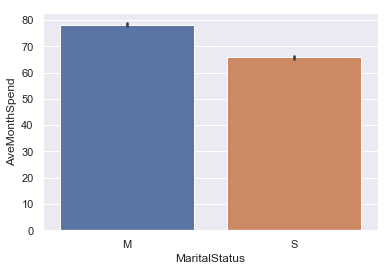

In [10]:
sns.barplot(data=AWTrain, x='MaritalStatus', y='AveMonthSpend')

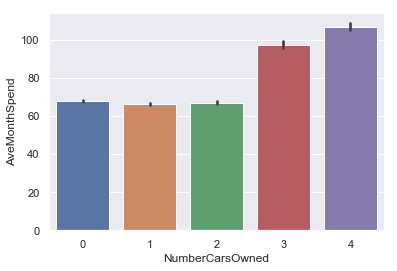

In [11]:
sns.barplot(data=AWTrain, x='NumberCarsOwned', y='AveMonthSpend')

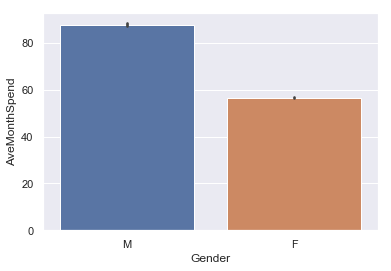

In [12]:
sns.barplot(data=AWTrain, x='Gender', y='AveMonthSpend')

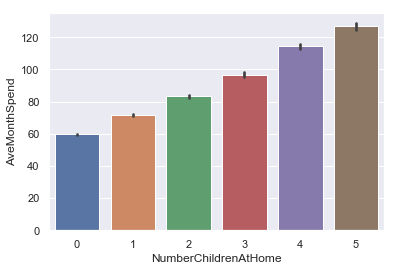

In [13]:
sns.barplot(data=AWTrain, x='NumberChildrenAtHome', y='AveMonthSpend')

In [14]:
AWTrain.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,20200.378523,0.672671,1.508106,0.997211,2.016096,78084.818700,0.331513,72.494625
std,5354.643340,0.469252,1.137949,1.519436,1.685089,39616.621179,0.470771,27.374399
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,0.000000,22.000000
25%,15531.000000,0.000000,1.000000,0.000000,0.000000,47773.000000,0.000000,52.000000
50%,20157.000000,1.000000,2.000000,0.000000,2.000000,76090.000000,0.000000,68.000000
75%,24850.000000,1.000000,2.000000,2.000000,3.000000,105065.000000,1.000000,84.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,1.000000,176.000000


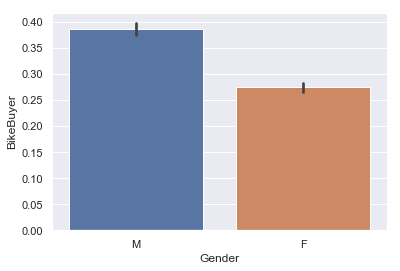

In [15]:
sns.barplot(data=AWTrain, x='Gender', y='BikeBuyer')

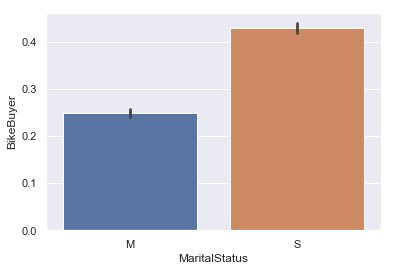

In [16]:
sns.barplot(data=CustomerTrain, x='MaritalStatus', y='BikeBuyer')

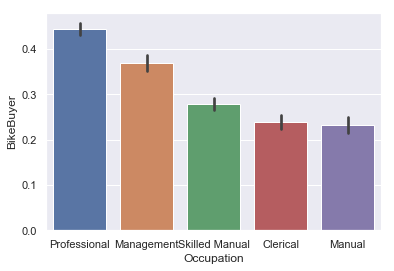

In [17]:
sns.barplot(data=CustomerTrain, x='Occupation', y='BikeBuyer')

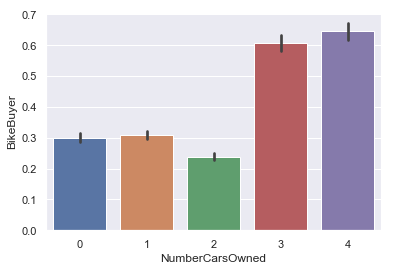

In [18]:
sns.barplot(data=CustomerTrain, x='NumberCarsOwned', y='BikeBuyer')

In [19]:
AWTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 0 to 17208
Data columns (total 21 columns):
CustomerID              17209 non-null int64
FirstName               17209 non-null object
LastName                17209 non-null object
AddressLine1            17209 non-null object
City                    17209 non-null object
StateProvinceName       17209 non-null object
CountryRegionName       17209 non-null object
PostalCode              17209 non-null object
PhoneNumber             17209 non-null object
BirthDate               17209 non-null object
Education               17209 non-null object
Occupation              17209 non-null object
Gender                  17209 non-null object
MaritalStatus           17209 non-null object
HomeOwnerFlag           17209 non-null int64
NumberCarsOwned         17209 non-null int64
NumberChildrenAtHome    17209 non-null int64
TotalChildren           17209 non-null int64
YearlyIncome            17209 non-null int64
BikeBuyer              

In [20]:
cat_col=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']
num_col=['YearlyIncome', 'AveMonthSpend', 'BirthMonth', 'BirthYear']

In [21]:
for col in cat_col:
    print(AWTrain[col].value_counts())
    print('')

United States     7292
Australia         3355
United Kingdom    1751
France            1668
Germany           1654
Canada            1489
Name: CountryRegionName, dtype: int64

Bachelors              4996
Partial College        4682
High School            3112
Graduate Degree        2935
Partial High School    1484
Name: Education, dtype: int64

Professional      5209
Skilled Manual    4227
Management        2830
Clerical          2751
Manual            2192
Name: Occupation, dtype: int64

M    8717
F    8492
Name: Gender, dtype: int64

M    9307
S    7902
Name: MaritalStatus, dtype: int64

1    11576
0     5633
Name: HomeOwnerFlag, dtype: int64

2    6056
1    4556
0    3901
3    1499
4    1197
Name: NumberCarsOwned, dtype: int64

0    10386
1     2299
2     1504
3     1120
4     1006
5      894
Name: NumberChildrenAtHome, dtype: int64

0    4405
2    3292
1    3229
4    2397
3    2068
5    1818
Name: TotalChildren, dtype: int64

0    11504
1     5705
Name: BikeBuyer, dtype: int64



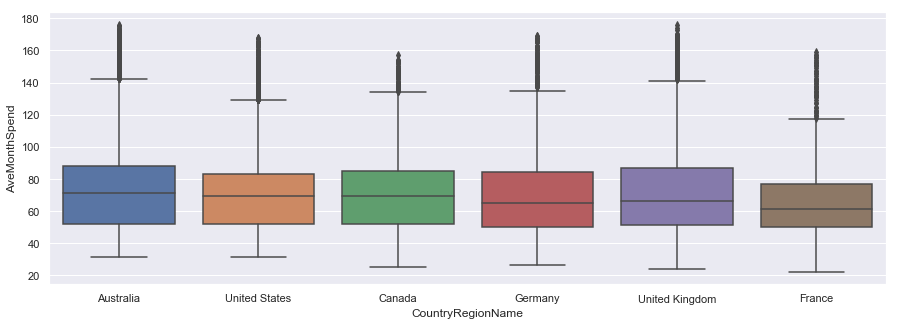

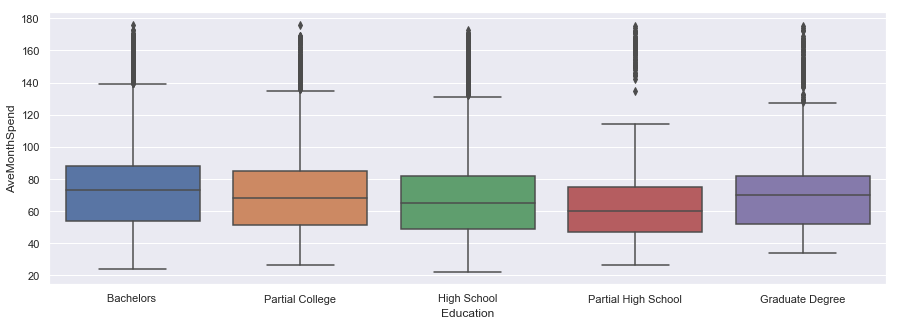

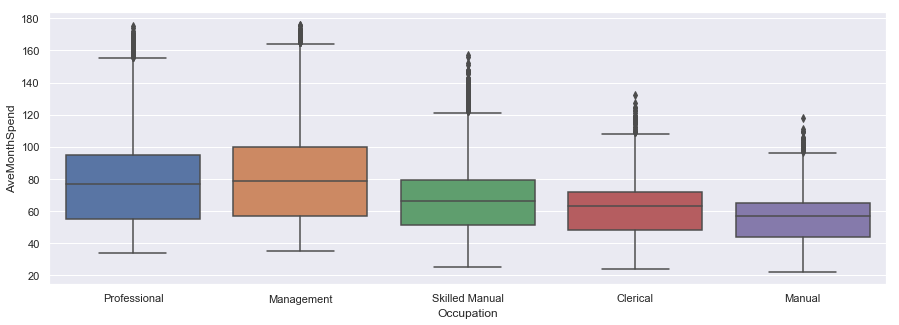

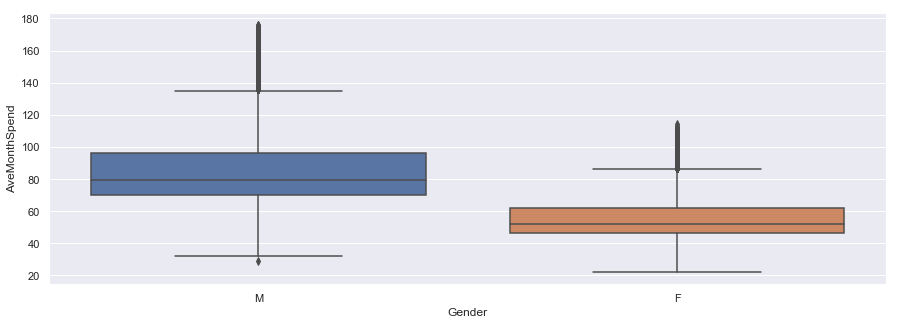

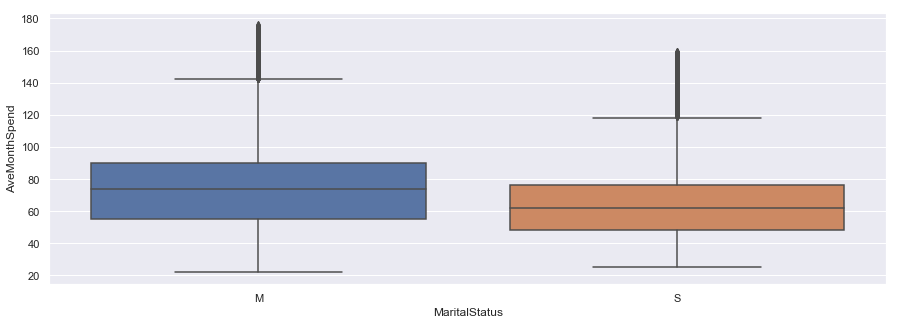

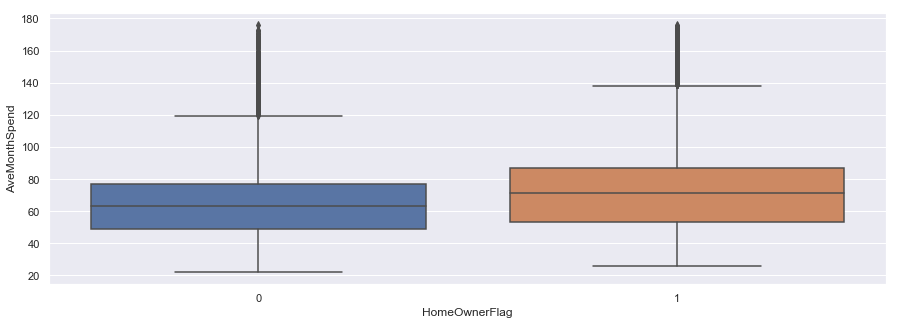

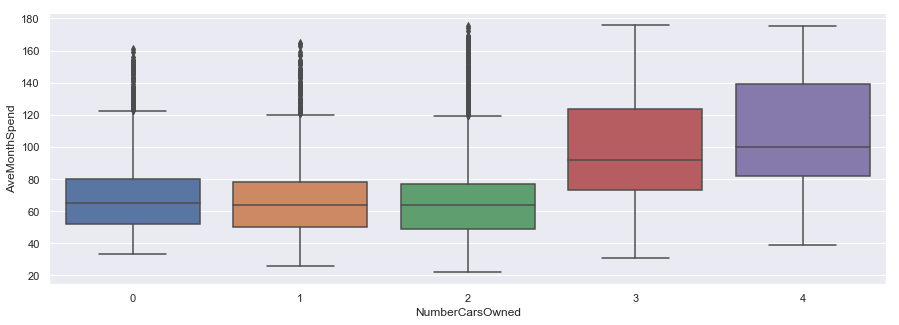

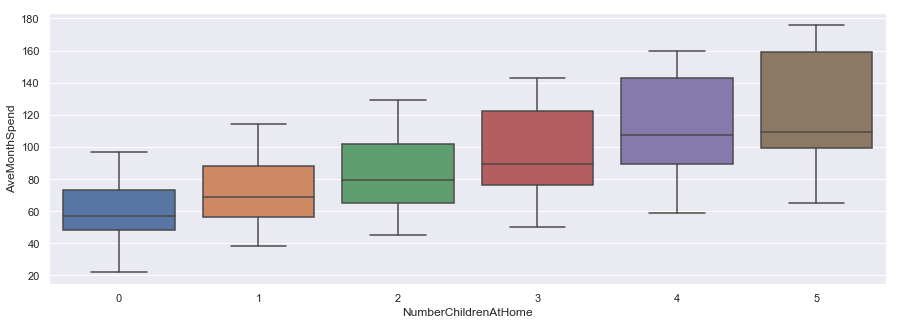

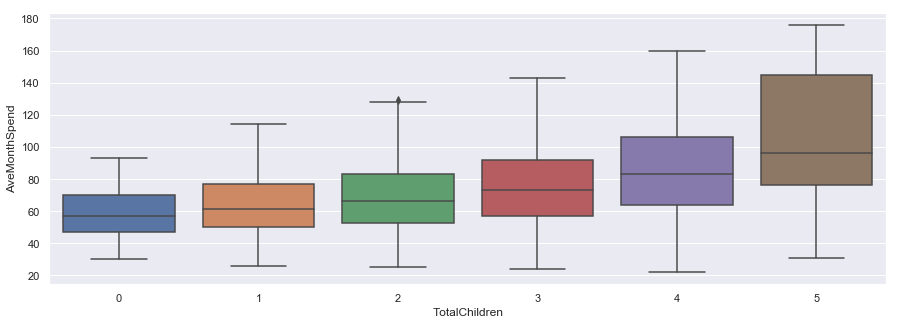

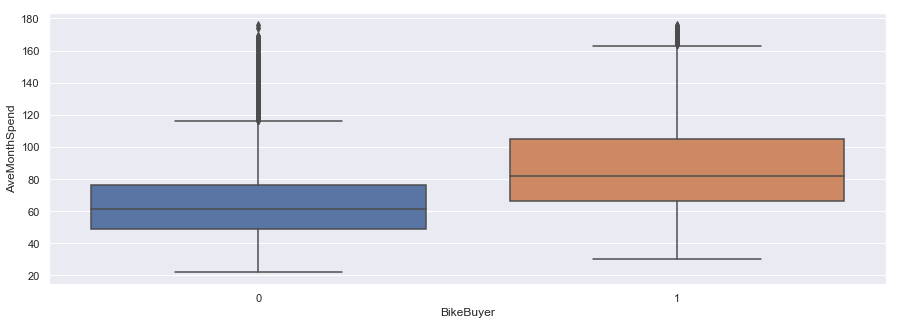

In [22]:
def plot_box(data, cols, col_y = None):
    for col in cols:
        plt.figure(figsize=(15,5))
        sns.boxplot(y=col_y, x=col, data=data)
        plt.ylabel(col_y) 
        plt.xlabel(col)
        plt.show()
        
plot_box(data=AWTrain,cols=cat_col,col_y='AveMonthSpend')

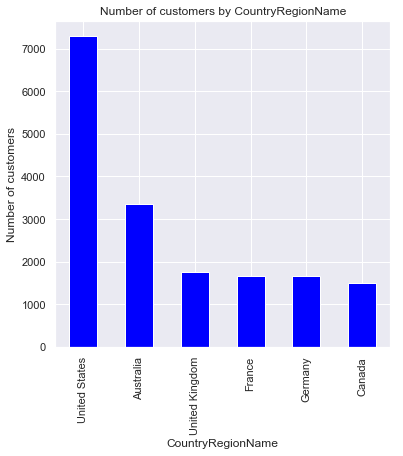

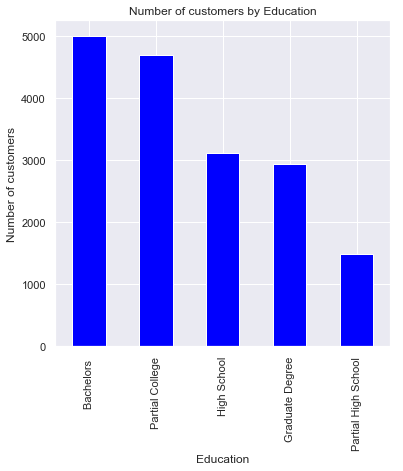

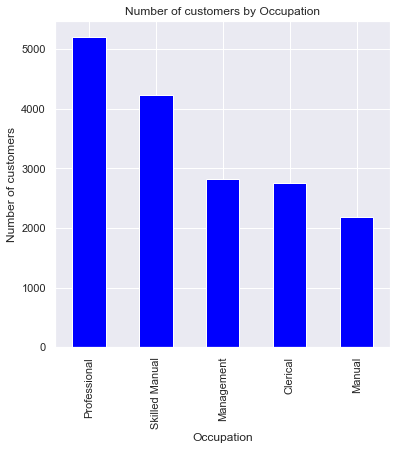

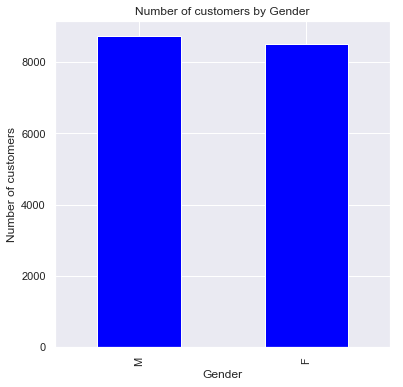

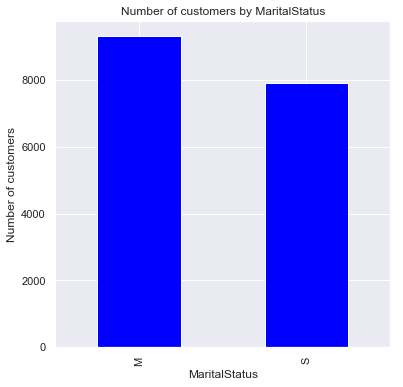

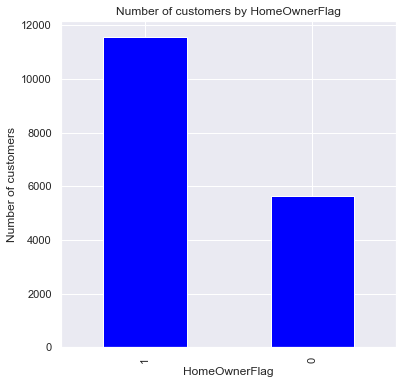

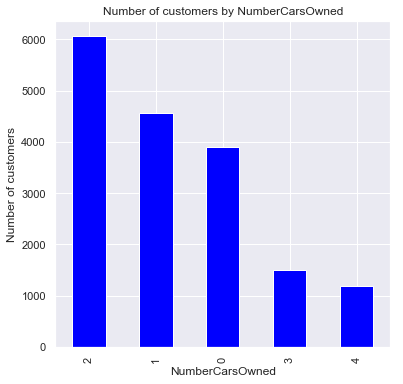

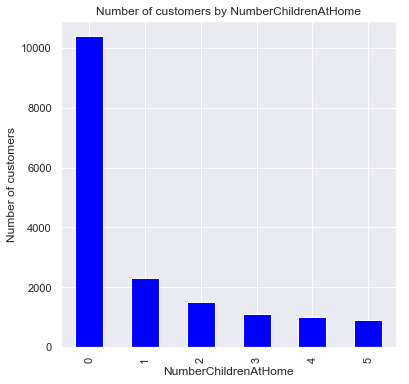

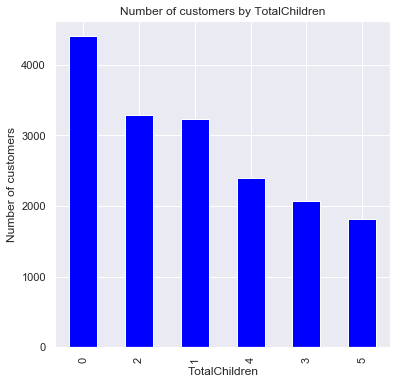

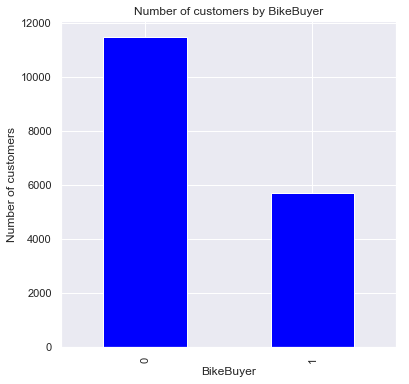

In [23]:
for col in cat_col:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()   
        counts = AWTrain[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Number of customers by ' + col)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()

In [24]:
AWTrain['BirthYear']=pd.to_datetime(AWTrain['BirthDate']).dt.year;
AWTrain['BirthMonth']=pd.to_datetime(AWTrain['BirthDate']).dt.month;
AWTrain.drop(['BirthDate'],axis=1,inplace=True)

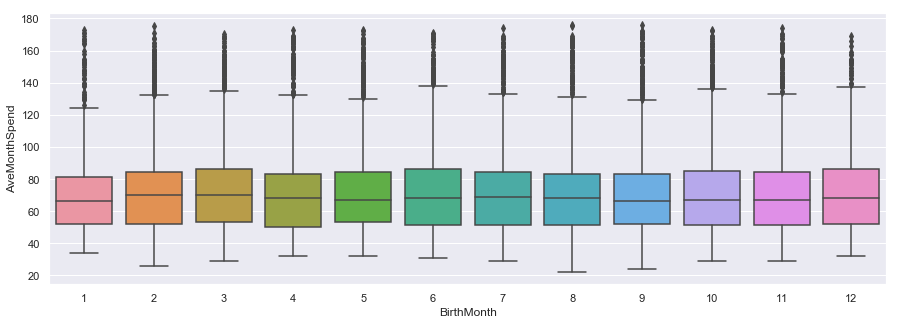

In [25]:
plot_box(data=AWTrain,cols=['BirthMonth'],col_y='AveMonthSpend')

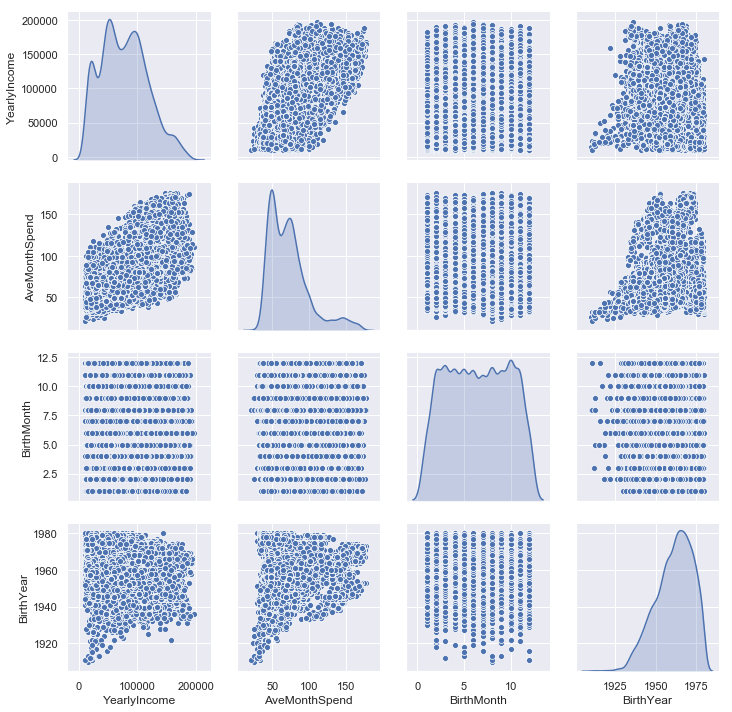

In [26]:
sns.pairplot(AWTrain[num_col],diag_kind='kde')

In [27]:
CustomerTest= pd.read_csv('AW_test.csv')
CustomerTest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


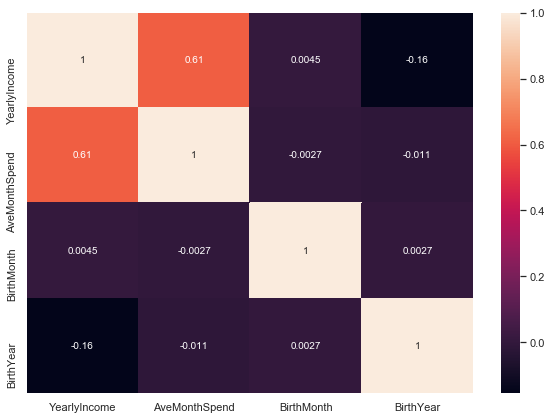

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(AWTrain[num_col].corr(),annot=True)

In [29]:
AWTrain.shape

(17209, 22)

In [30]:
CustomerTest.shape

(500, 23)

In [31]:
CustomerTest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


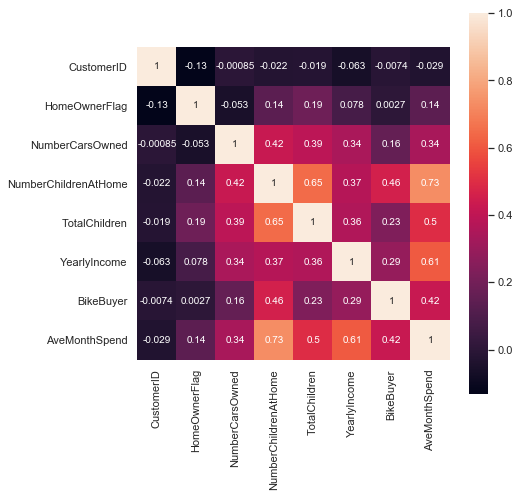

In [32]:
corrmat= CustomerTrain.corr()
f, ax =plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, square=True, annot=True)